In [1]:
import pandas as pd
import numpy as np

# Read CSV data into a pandas DataFrame
df = pd.read_csv('complete_dataset.csv', low_memory=False)

# If you want to replace all the blank entries with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.replace(np.nan, 0, regex=True)

df = df.rename(columns={"Unnamed: 0": "id"})

# Print the unique columns
print(df.head())

   id               Name  Age  \
0   0  Cristiano Ronaldo   32   
1   1           L. Messi   30   
2   2             Neymar   25   
3   3          L. Suárez   30   
4   4           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club         

In [2]:
df = df.drop(columns=['Photo', 'Flag', 'Club Logo'])
print(df.head())

   id               Name  Age Nationality  Overall  Potential  \
0   0  Cristiano Ronaldo   32    Portugal       94         94   
1   1           L. Messi   30   Argentina       93         93   
2   2             Neymar   25      Brazil       92         94   
3   3          L. Suárez   30     Uruguay       92         92   
4   4           M. Neuer   31     Germany       92         92   

                  Club   Value   Wage  Special  ...    RB   RCB   RCM   RDM  \
0       Real Madrid CF  €95.5M  €565K     2228  ...  61.0  53.0  82.0  62.0   
1         FC Barcelona   €105M  €565K     2154  ...  57.0  45.0  84.0  59.0   
2  Paris Saint-Germain   €123M  €280K     2100  ...  59.0  46.0  79.0  59.0   
3         FC Barcelona    €97M  €510K     2291  ...  64.0  58.0  80.0  65.0   
4     FC Bayern Munich    €61M  €230K     1493  ...   0.0   0.0   0.0   0.0   

     RF    RM    RS    RW   RWB    ST  
0  91.0  89.0  92.0  91.0  66.0  92.0  
1  92.0  90.0  88.0  91.0  62.0  88.0  
2  88.0  87.0 

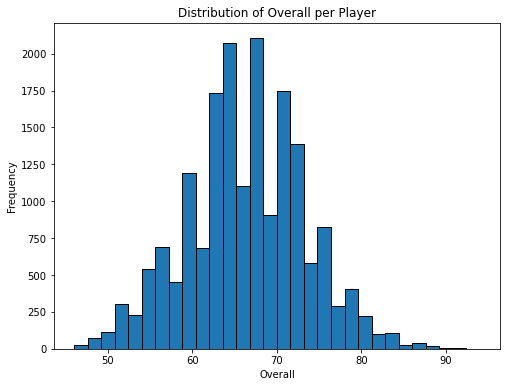

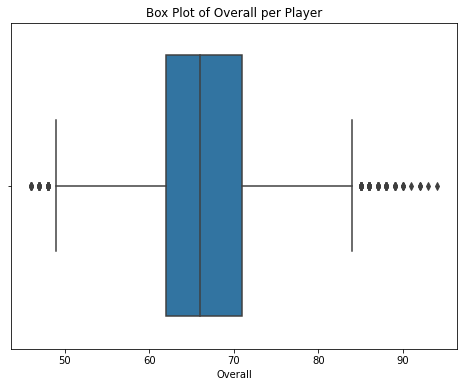

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram This code plots the histogram graph based on the average steps taken
plt.figure(figsize=(8, 6))
plt.hist(df['Overall'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Overall per Player')
plt.xlabel('Overall')
plt.ylabel('Frequency')
plt.show()

# Boxplot This code plots the boxplot graph based on the data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Overall'].dropna())
plt.title('Box Plot of Overall per Player')
plt.xlabel('Overall')
plt.show()

In [4]:
summary_stats = df['Overall'].describe()
print(summary_stats)

count    17981.000000
mean        66.247984
std          6.987965
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64


In [5]:
# Mean
mean = df['Overall'].mean()
print('Mean: ', mean)

# Median
median = df['Overall'].median()
print('Median: ', median)

# Standard Deviation
std_dev = df['Overall'].std()
print('Standard Deviation: ', std_dev)

Mean:  66.24798398309326
Median:  66.0
Standard Deviation:  6.987965339747166


In [6]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Plot the relation between mean steps, gender, and education still getting error
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df, x='Preferred Positions', y='Overall', hue='Value')
# plt.xlabel('Position')
# plt.ylabel('Overall')
# plt.title('Relation of Overall per Player with Preferred Positions and Value')
# plt.legend(title='Value')
# plt.show()

In [7]:
# Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It is also used for dimensionality reduction, treats missing values, outlier values, and other essential steps of data exploration, and does a fairly good job.

In [8]:
# Random Forest works by creating multiple decision trees (as specified by the user) and merges them together. The idea behind this is that the group (or "forest") of decision trees will be able to make more accurate predictions and decisions than a single decision tree. Each decision tree in the forest considers a random subset of observations and a random subset of features to split on at each node, introducing randomness into the model creation process.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = df.astype(int, errors='ignore')

# data cleaning because it cannot calculate the model with strings
def value_to_int(df_value):
    if isinstance(df_value, int):
        return df_value

    if df_value == '' or df_value == ' ' or df_value == '€0':
        return 0

    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]
        
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000

        return value
    except (TypeError, ValueError):
        return df_value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

x = df.drop('Name', axis=1)
print(df.head())

   id               Name  Age Nationality  Overall  Potential  \
0   0  Cristiano Ronaldo   32    Portugal       94         94   
1   1           L. Messi   30   Argentina       93         93   
2   2             Neymar   25      Brazil       92         94   
3   3          L. Suárez   30     Uruguay       92         92   
4   4           M. Neuer   31     Germany       92         92   

                  Club        Value      Wage  Special  ...  RB RCB RCM RDM  \
0       Real Madrid CF   95500000.0  565000.0     2228  ...  61  53  82  62   
1         FC Barcelona  105000000.0  565000.0     2154  ...  57  45  84  59   
2  Paris Saint-Germain  123000000.0  280000.0     2100  ...  59  46  79  59   
3         FC Barcelona   97000000.0  510000.0     2291  ...  64  58  80  65   
4     FC Bayern Munich   61000000.0  230000.0     1493  ...   0   0   0   0   

   RF  RM  RS  RW RWB  ST  
0  91  89  92  91  66  92  
1  92  90  88  91  62  88  
2  88  87  84  89  64  84  
3  88  85  88  87  68 

In [10]:
def value_to_sum(df_value):
    if isinstance(df_value, int):
        return df_value

    if isinstance(df_value, str):
        if '+' in df_value:
            values = df_value.split('+')
            return sum(int(v) for v in values if v.isdigit())
        elif '-' in df_value:
            values = df_value.split('-')
            return int(values[0]) - int(values[1]) if values[0].isdigit() and values[1].isdigit() else df_value
        elif df_value.isdigit():
            return int(df_value)
        else:
            return df_value
    else:
        return df_value

# To clean the data we have to sum up the cells that have values like 81+2
for col in df.columns:
    df[col] = df[col].apply(value_to_sum)    
    
print(df.head())

   id               Name  Age Nationality  Overall  Potential  \
0   0  Cristiano Ronaldo   32    Portugal       94         94   
1   1           L. Messi   30   Argentina       93         93   
2   2             Neymar   25      Brazil       92         94   
3   3          L. Suárez   30     Uruguay       92         92   
4   4           M. Neuer   31     Germany       92         92   

                  Club        Value      Wage  Special  ...  RB  RCB  RCM  \
0       Real Madrid CF   95500000.0  565000.0     2228  ...  61   53   82   
1         FC Barcelona  105000000.0  565000.0     2154  ...  57   45   84   
2  Paris Saint-Germain  123000000.0  280000.0     2100  ...  59   46   79   
3         FC Barcelona   97000000.0  510000.0     2291  ...  64   58   80   
4     FC Bayern Munich   61000000.0  230000.0     1493  ...   0    0    0   

   RDM  RF  RM  RS  RW  RWB  ST  
0   62  91  89  92  91   66  92  
1   59  92  90  88  91   62  88  
2   59  88  87  84  89   64  84  
3   65  88

In [11]:
dummy_nationality = pd.get_dummies(df['Nationality'], prefix='Nationality', drop_first=True)
dummy_club = pd.get_dummies(df['Club'], prefix='Club', drop_first=True)
dummy_positions = pd.get_dummies(df['Preferred Positions'], prefix='Preferred Positions', drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummy_nationality, dummy_club, dummy_positions], axis=1)

# Drop the original categorical variables from the dataframe
df.drop(['Nationality', 'Club', 'Name', 'Preferred Positions'], axis=1, inplace=True)

print(df.head())

   id  Age  Overall  Potential        Value      Wage  Special  Acceleration  \
0   0   32       94         94   95500000.0  565000.0     2228            89   
1   1   30       93         93  105000000.0  565000.0     2154            92   
2   2   25       92         94  123000000.0  280000.0     2100            94   
3   3   30       92         92   97000000.0  510000.0     2291            88   
4   4   31       92         92   61000000.0  230000.0     1493            58   

   Aggression  Agility  ...  Preferred Positions_ST RM CF   \
0          63       89  ...                              0   
1          48       90  ...                              0   
2          56       96  ...                              0   
3          78       86  ...                              0   
4          29       52  ...                              0   

   Preferred Positions_ST RM LM   Preferred Positions_ST RM LM CAM   \
0                              0                                  0   
1   

In [12]:
import numpy as np

# In order to convert your model to a classification problem, you'll first need to transform your target variable into a categorical one. For instance, you could split the Value variable into categories such as "low", "medium", and "high". Note that these categories need to be defined according to some logic based on your specific context. In this example, we will define them arbitrarily, and you can adjust this to better suit your needs.

# Let's say we define these categories based on the percentile distribution of Value:

# "Low" if Value is below the 33rd percentile,
# "Medium" if Value is between the 33rd and 66th percentile,
# "High" if Value is above the 66th percentile.

# Define percentile thresholds
low_threshold = np.percentile(df['Value'], 33)
high_threshold = np.percentile(df['Value'], 66)

# Define a function to convert a continuous value to a category
def value_to_category(value):
    if value < low_threshold:
        return 'low'
    elif value < high_threshold:
        return 'medium'
    else:
        return 'high'

# Apply the function to the 'Value' column to create a new 'ValueCategory' column
df['ValueCategory'] = df['Value'].apply(value_to_category)

print(df.head()['ValueCategory'])

0    high
1    high
2    high
3    high
4    high
Name: ValueCategory, dtype: object


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

x = df.drop('ValueCategory', axis=1)
y = df['ValueCategory']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

# Predictions
predictions = model.predict(x_test)

In [14]:
# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')  # change to 'weighted' because we have multiple classes now
recall = recall_score(y_test, predictions, average='weighted')  # change to 'weighted' because we have multiple classes now

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
